In [1]:
import keras_tuner as kt
from sklearn import ensemble
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn import pipeline

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2)

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

In [4]:
y

array([1, 3, 6, 5, 6, 7, 2, 5, 0, 5, 3, 7, 0, 1, 5, 0, 3, 5, 5, 6, 5, 5,
       3, 1, 1, 4, 1, 5, 4, 0, 1, 6, 7, 1, 4, 2, 3, 0, 1, 3, 0, 5, 6, 2,
       4, 3, 6, 4, 7, 2, 0, 7, 0, 1, 7, 4, 4, 2, 4, 3, 6, 3, 4, 2, 0, 5,
       4, 6, 3, 1, 0, 1, 3, 4, 6, 3, 7, 0, 1, 1, 1, 2, 5, 6, 6, 2, 5, 0,
       3, 0, 7, 4, 2, 5, 3, 6, 7, 5, 1, 0, 4, 7, 5, 2, 6, 0, 3, 0, 5, 2,
       2, 2, 7, 6, 6, 5, 5, 2, 1, 6, 5, 1, 0, 2, 4, 6, 7, 7, 7, 6, 0, 7,
       6, 1, 6, 5, 7, 3, 3, 5, 6, 3, 0, 1, 3, 1, 4, 4, 1, 2, 0, 7, 5, 4,
       7, 6, 7, 4, 4, 6, 3, 5, 2, 4, 6, 7, 0, 2, 3, 1, 4, 4, 0, 6, 2, 5,
       3, 3, 5, 1, 4, 5, 2, 7, 6, 5, 5, 7, 4, 5, 0, 6, 0, 4, 1, 4, 3, 1,
       5, 2, 5, 2, 6, 1, 4, 7, 5, 0, 4, 5, 5, 6, 3, 4, 2, 1, 3, 0, 0, 1,
       2, 0, 5, 0, 5, 1, 6, 6, 6, 0, 3, 3, 0, 1, 0, 5, 7, 7, 1, 5, 4, 0,
       0, 0, 4, 0, 5, 6, 1, 5, 5, 1, 2, 6, 2, 4, 2, 1, 0, 7, 5, 4, 6, 5,
       6, 2, 4, 2, 0, 2, 5, 7, 1, 7, 2, 2, 5, 1, 0, 6, 7, 6, 4, 5, 0, 0,
       4, 3, 7, 5, 0, 0, 5, 0, 1, 2, 0, 6, 6, 6, 4,

Optimal number of features : 3


C:\Users\furyx\miniconda3\envs\tf27\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


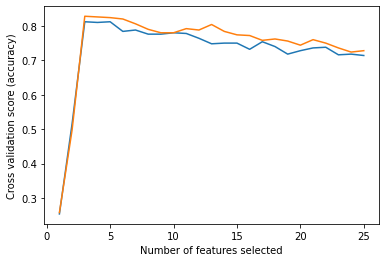

In [5]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

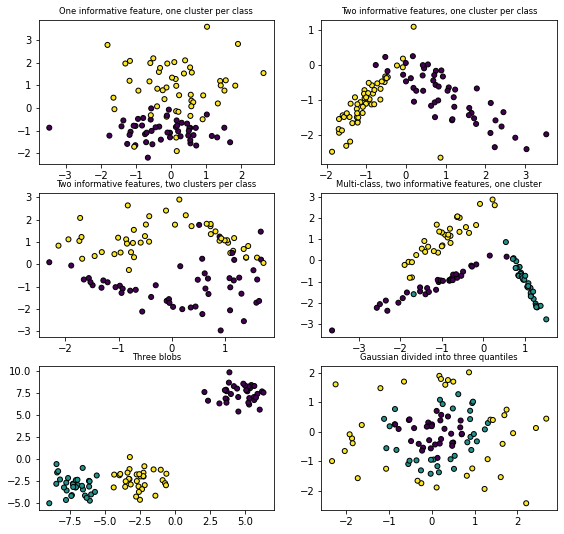

In [6]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(323)
plt.title("Two informative features, two clusters per class", fontsize="small")
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(325)
plt.title("Three blobs", fontsize="small")
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize="small")
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.show()